Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df  = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


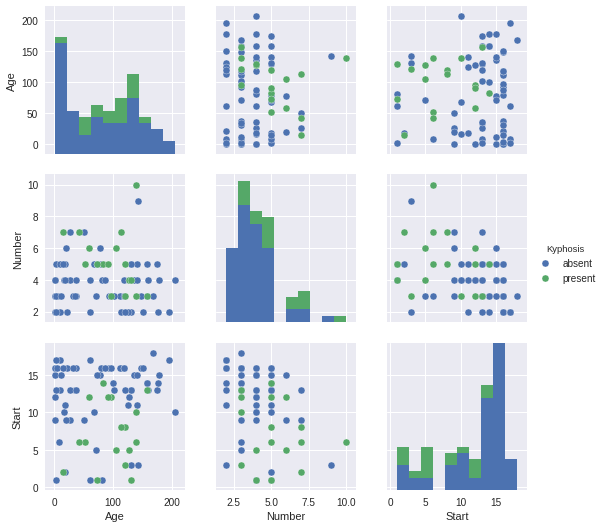

In [6]:
sns.pairplot(df,hue='Kyphosis')

In [8]:
 from sklearn.cross_validation import train_test_split

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X = df.drop('Kyphosis',axis=1)

In [11]:
y = df['Kyphosis']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
pred = dtree.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[18  5]
 [ 2  0]]
             precision    recall  f1-score   support

     absent       0.90      0.78      0.84        23
    present       0.00      0.00      0.00         2

avg / total       0.83      0.72      0.77        25



In [19]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=500,verbose=True)

In [32]:
krf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=True, warm_start=False)

In [33]:
rf_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [34]:
print(confusion_matrix(rf_pred,y_test))
print(classification_report(rf_pred,y_test))

[[18  5]
 [ 2  0]]
             precision    recall  f1-score   support

     absent       0.90      0.78      0.84        23
    present       0.00      0.00      0.00         2

avg / total       0.83      0.72      0.77        25



In [36]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64